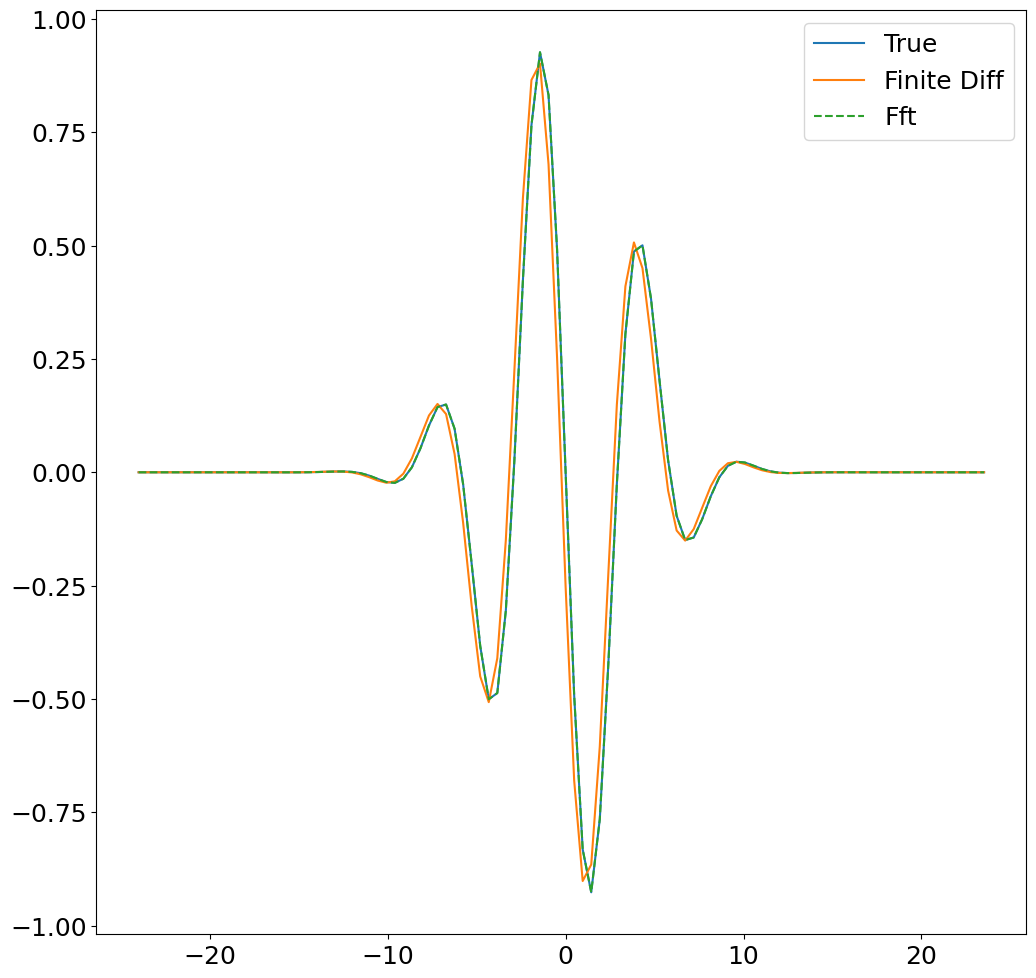

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [12,12]
plt.rcParams.update({'font.size': 18})

# Defining function to set
n = 100
L = 48
dx = L/n
x = np.arange(-L/2, L/2, dx, dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25)
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative by hand

# Approx using finite difference
df_fd = np.zeros(len(df), dtype="complex_")
for k in range(len(df)-1):
    df_fd[k] = (f[k+1] - f[k]) / dx

df_fd[-1] = df_fd[-2]

# Approx using FFT
f_h = np.fft.fft(f)
w = (2*np.pi/L) * np.arange(-n/2,n/2)
w_shift = np.fft.fftshift(w)     # Needed for ordering the w values
df_h = w_shift * f_h * (1j)
df_fft = np.real(np.fft.ifft(df_h))

plt.plot(x,df.real)
plt.plot(x,df_fd.real)
plt.plot(x,df_fft.real,'--')
plt.legend(["True", "Finite Diff", "Fft"])

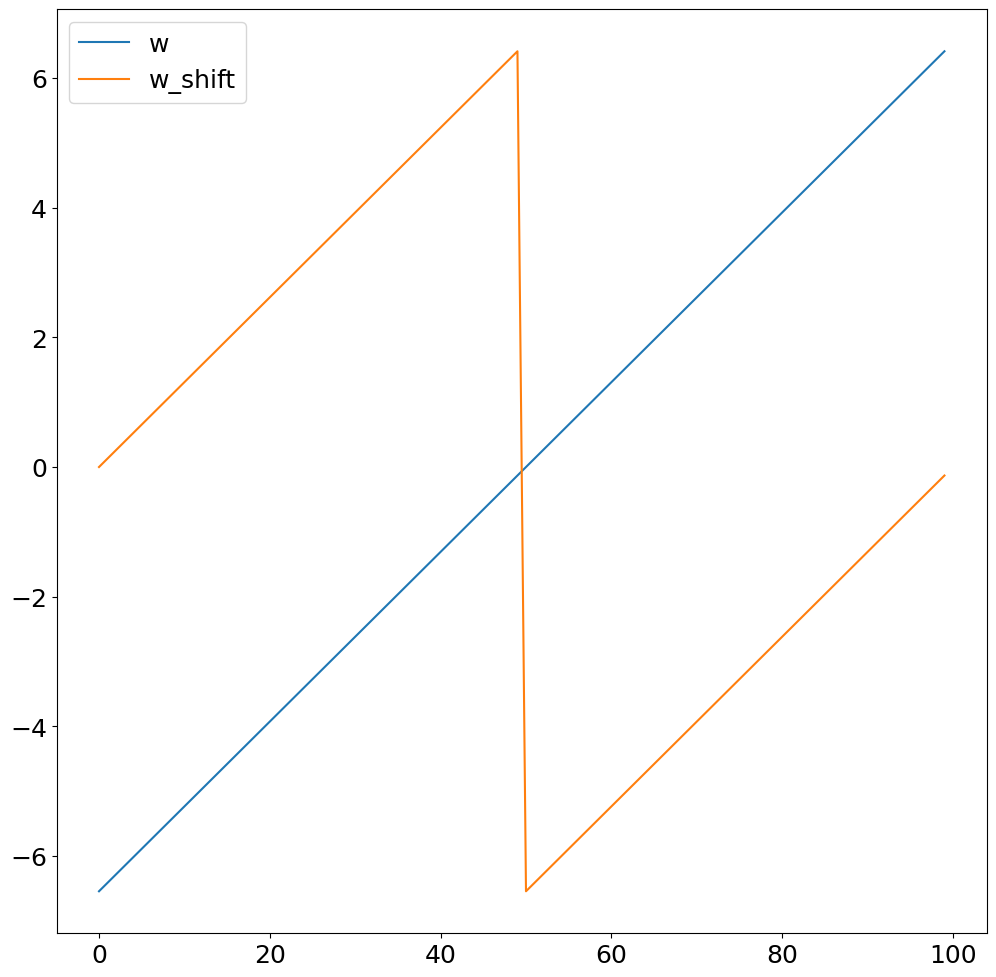

In [18]:
plt.plot(w)
plt.plot(w_shift)
plt.legend(["w","w_shift"])